<a href="https://colab.research.google.com/github/avikalsagar/Predicting_Annual_Variability_Renewable_Energy/blob/main/5.%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import dates as md
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import graphviz

In [4]:
data = pd.read_csv("Final 2018,20,21 data.csv")

In [5]:
data.head(5)

,date_time,surface_net_solar_radiation,temperature_2m,total_precipitation,u_component_of_wind_10m,Hour,Load,Coal,Diesel,Hydro,Gas,Nuclear,Solar,Waste,Wind,Waste heat,Other,Date
0,01-01-2018 01:00,0.0,254.192533,4.440000e-08,1.074556,1.0,435175.406,252979.6,8.8,8437.6,115428.1,24410.6,0.0,130.8,41819.9,0.0,326.9,01-01-2018
1,01-01-2018 02:00,0.0,253.602073,4.540000e-08,1.023605,2.0,433136.664,254174.5,0.0,6373.6,109497.4,24414.7,1.4,130.3,38397.5,0.0,326.2,01-01-2018
2,01-01-2018 03:00,0.0,253.110512,4.540000e-08,0.942507,3.0,432544.152,254355.6,0.0,6355.1,111666.6,24408.1,14.2,131.1,38098.6,0.0,325.1,01-01-2018
3,01-01-2018 04:00,0.0,252.674437,4.540000e-08,0.921040,4.0,432570.416,255091.5,0.0,6351.8,109633.5,24413.0,54.7,131.9,37790.8,0.0,327.5,01-01-2018
4,01-01-2018 05:00,0.0,252.256571,4.540000e-08,0.947823,5.0,436211.546,253726.0,0.0,6511.0,119693.8,24413.1,91.1,131.0,35006.1,0.0,326.5,01-01-2018


In [6]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['Day'] = data['date_time'].dt.day
data['Month'] = data['date_time'].dt.month

In [7]:
data.set_index('date_time', inplace=True)
data = data.sort_index()
data = data[~data.index.duplicated(keep='first')]
data = data.drop('Date', axis=1)
data

,surface_net_solar_radiation,temperature_2m,total_precipitation,u_component_of_wind_10m,Hour,Load,Coal,Diesel,Hydro,Gas,Nuclear,Solar,Waste,Wind,Waste heat,Other,Day,Month
date_time,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,0.0,254.192533,4.440000e-08,1.074556,1.0,435175.406,252979.6,8.8,8437.6,115428.1,24410.6,0.0,130.8,41819.9,0.0,326.9,1,1
2018-01-01 02:00:00,0.0,253.602073,4.540000e-08,1.023605,2.0,433136.664,254174.5,0.0,6373.6,109497.4,24414.7,1.4,130.3,38397.5,0.0,326.2,1,1
2018-01-01 03:00:00,0.0,253.110512,4.540000e-08,0.942507,3.0,432544.152,254355.6,0.0,6355.1,111666.6,24408.1,14.2,131.1,38098.6,0.0,325.1,1,1
2018-01-01 04:00:00,0.0,252.674437,4.540000e-08,0.921040,4.0,432570.416,255091.5,0.0,6351.8,109633.5,24413.0,54.7,131.9,37790.8,0.0,327.5,1,1
2018-01-01 05:00:00,0.0,252.256571,4.540000e-08,0.947823,5.0,436211.546,253726.0,0.0,6511.0,119693.8,24413.1,91.1,131.0,35006.1,0.0,326.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,4061524.0,269.510712,8.520000e-07,-0.872406,19.0,369182.601,90605.8,0.0,11651.7,28258.4,24489.6,0.0,152.2,221667.0,0.0,217.1,31,12
2021-12-31 20:00:00,4924492.0,269.584656,8.520000e-07,-1.601669,20.0,361129.679,85560.6,0.0,11665.2,27978.8,24491.4,0.0,151.8,224758.4,0.0,215.8,31,12
2021-12-31 21:00:00,5640718.0,269.483490,8.520000e-07,-2.133556,21.0,354789.218,85789.5,0.0,9837.1,28306.0,24500.4,0.0,152.1,219539.1,0.0,213.6,31,12


In [8]:
data = data.dropna(subset=[' Load'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26295 entries, 2018-01-01 01:00:00 to 2021-12-31 23:00:00
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   surface_net_solar_radiation  26295 non-null  float64
 1   temperature_2m               26295 non-null  float64
 2   total_precipitation          26295 non-null  float64
 3   u_component_of_wind_10m      26295 non-null  float64
 4   Hour                         26295 non-null  float64
 5    Load                        26295 non-null  float64
 6   Coal                         26295 non-null  float64
 7   Diesel                       26295 non-null  float64
 8   Hydro                        26295 non-null  float64
 9   Gas                          26295 non-null  float64
 10  Nuclear                      26295 non-null  float64
 11  Solar                        26295 non-null  float64
 12  Waste                        26295 non-

<Axes: >

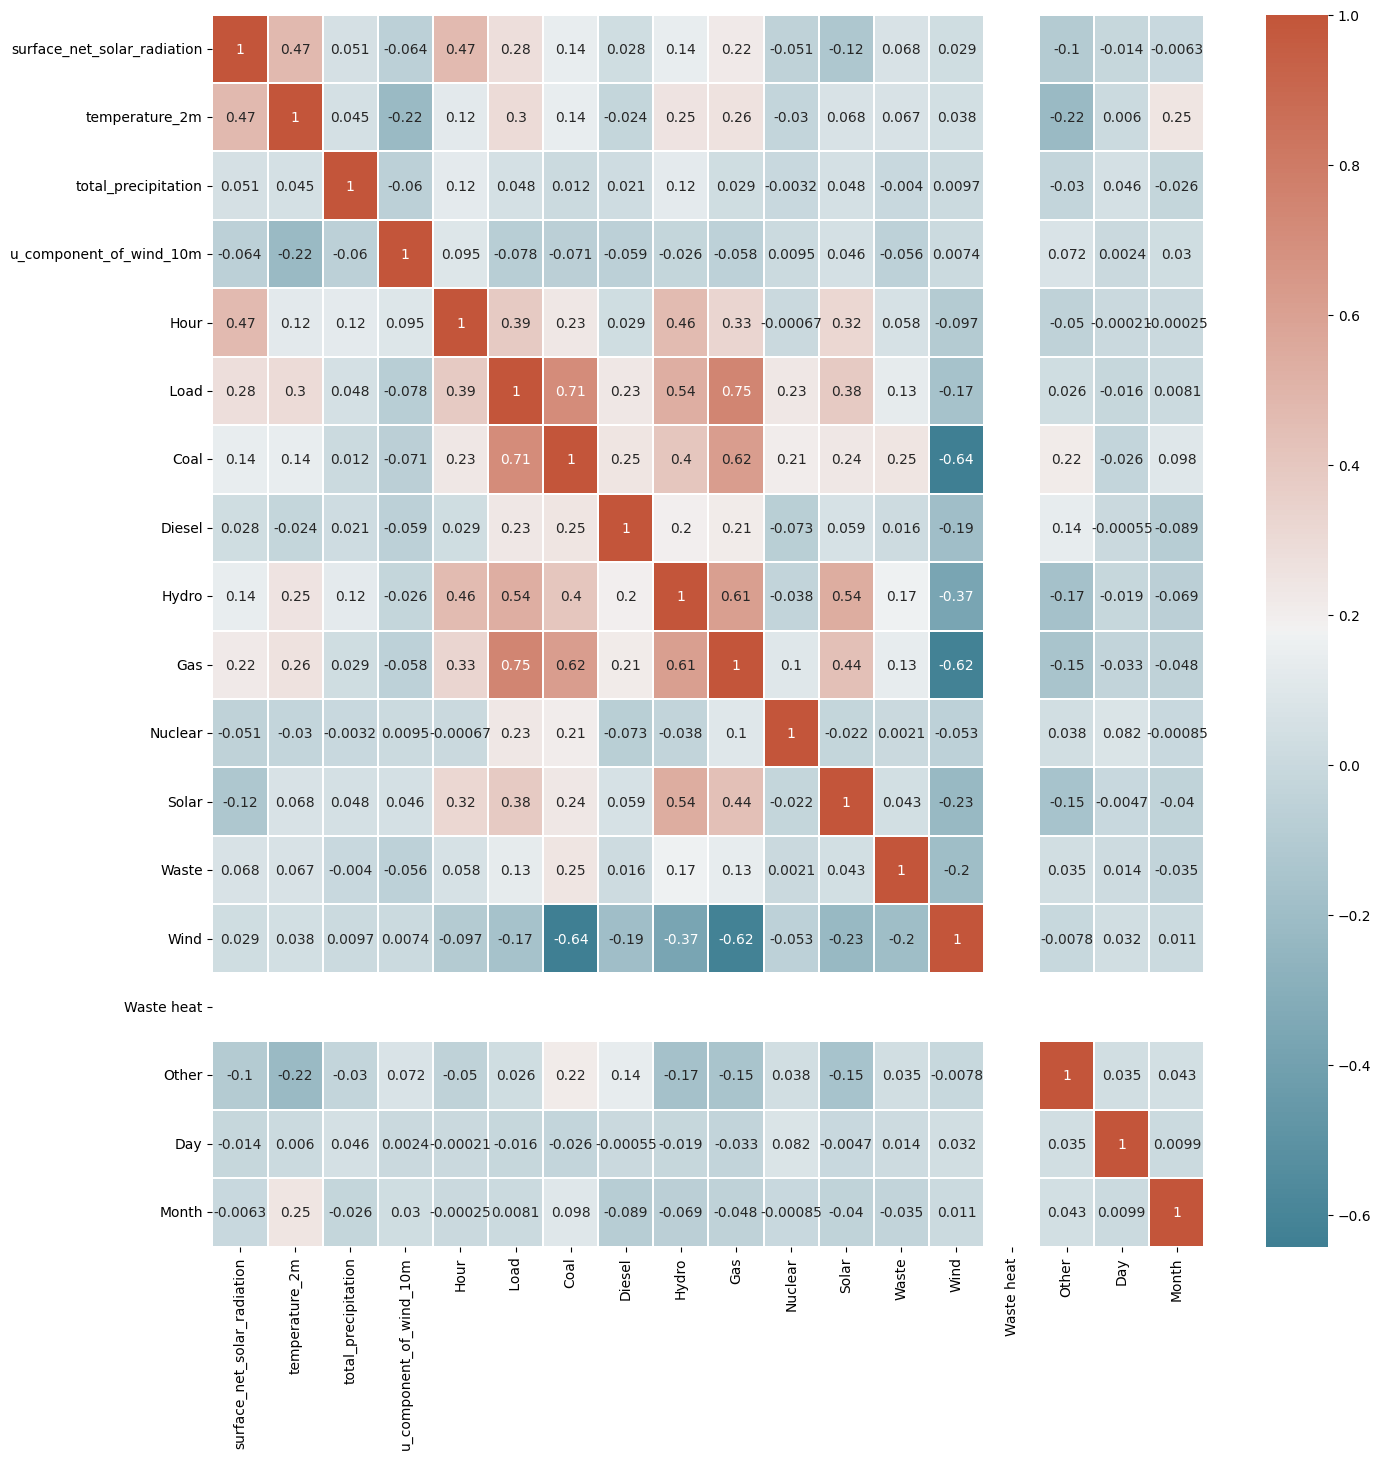

In [10]:
# calculate correlation matrix
df = pd.DataFrame(data)
corr = df.corr()
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.2, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

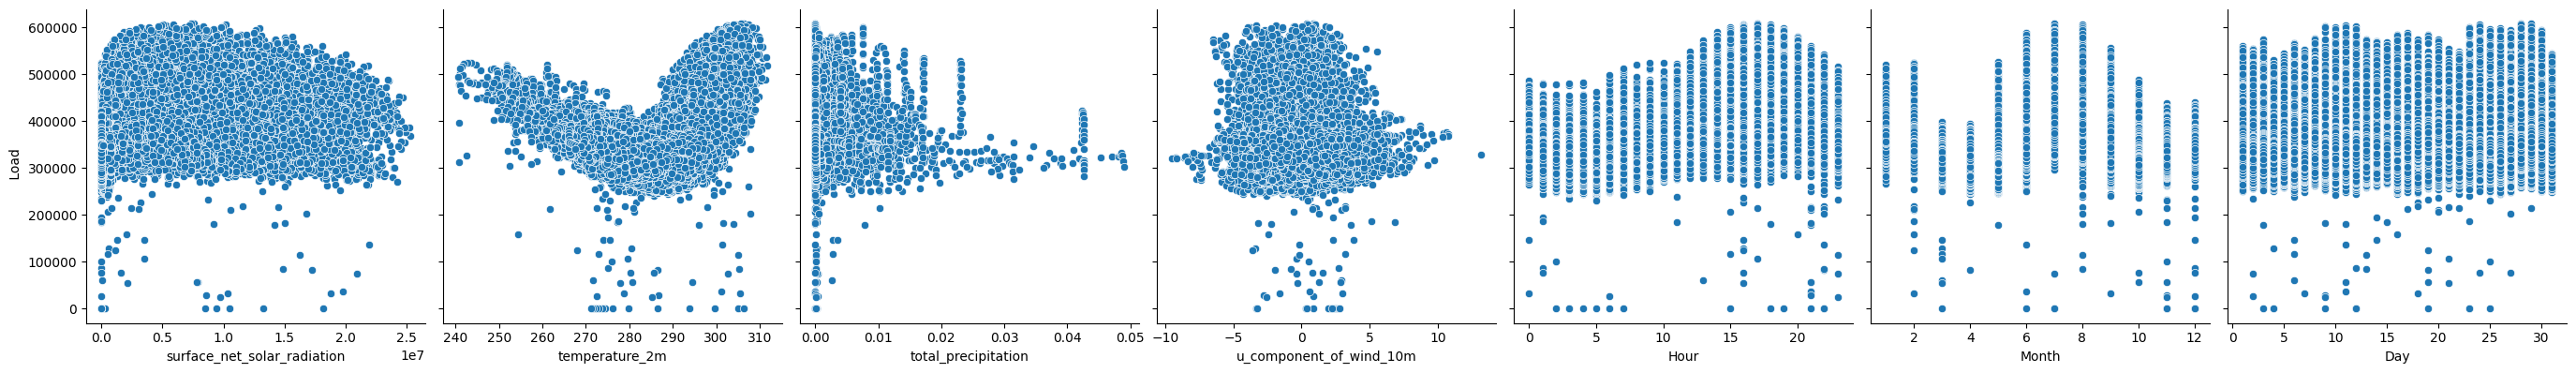

In [11]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data,
             x_vars=["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"],
             y_vars=' Load', height=4, aspect=1, kind='scatter')
plt.show()

In [12]:
columns = ["surface_net_solar_radiation",
            "temperature_2m",
            "total_precipitation",
            "u_component_of_wind_10m",
            "Hour",
            "Month",
            "Day"]
X = df[columns]
y = df[' Load']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [19]:
from sklearn.model_selection import train_test_split
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [15]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [21]:
X_train_0 = X_train_0.reshape((X_train_0.shape[0], 1, X_train_0.shape[1]))
X_test_0 = X_test_0.reshape((X_test_0.shape[0], 1, X_test_0.shape[1]))
print(X_train_0.shape, Y_train_0.shape, X_test_0.shape, Y_test_0.shape)

(21036, 1, 7) (21036, 1) (5259, 1, 7) (5259, 1)


In [22]:
X_train_0.shape[1]

1

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
from tensorflow.keras.layers import Input

In [25]:
model = Sequential()
model.add(Input(shape=(X_train_0.shape[1], X_train_0.shape[2]), dtype='float32'))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
#model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid' ))
model.compile(optimizer = "adam" , loss = 'mae', metrics=['accuracy'])
history = model.fit(X_train_0, Y_train_0, epochs=50, batch_size=256, validation_data=(X_test_0, Y_test_0), verbose=2, shuffle=False)
model.summary()

Epoch 1/50
83/83 - 18s - loss: 0.0817 - accuracy: 4.7538e-05 - val_loss: 0.0768 - val_accuracy: 0.0000e+00 - 18s/epoch - 217ms/step
Epoch 2/50
83/83 - 1s - loss: 0.0750 - accuracy: 4.7538e-05 - val_loss: 0.0763 - val_accuracy: 0.0000e+00 - 1s/epoch - 14ms/step
Epoch 3/50
83/83 - 1s - loss: 0.0745 - accuracy: 4.7538e-05 - val_loss: 0.0758 - val_accuracy: 0.0000e+00 - 1s/epoch - 14ms/step
Epoch 4/50
83/83 - 1s - loss: 0.0739 - accuracy: 4.7538e-05 - val_loss: 0.0753 - val_accuracy: 0.0000e+00 - 1s/epoch - 14ms/step
Epoch 5/50
83/83 - 1s - loss: 0.0734 - accuracy: 4.7538e-05 - val_loss: 0.0741 - val_accuracy: 0.0000e+00 - 1s/epoch - 14ms/step
Epoch 6/50
83/83 - 2s - loss: 0.0725 - accuracy: 4.7538e-05 - val_loss: 0.0728 - val_accuracy: 0.0000e+00 - 2s/epoch - 20ms/step
Epoch 7/50
83/83 - 2s - loss: 0.0711 - accuracy: 4.7538e-05 - val_loss: 0.0706 - val_accuracy: 0.0000e+00 - 2s/epoch - 24ms/step
Epoch 8/50
83/83 - 1s - loss: 0.0686 - accuracy: 4.7538e-05 - val_loss: 0.0667 - val_accuracy:

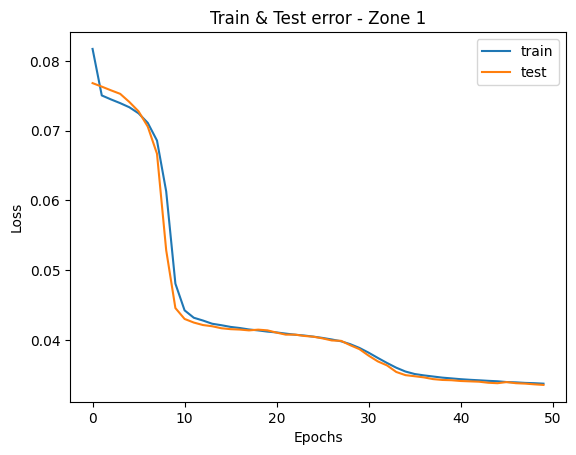

In [26]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train & Test error - Zone 1')
plt.legend()
plt.show()

In [27]:
yhat_1 = model.predict(X_test_0)
yhat_1 = yhat_1.reshape((yhat_1.shape[0], yhat_1.shape[2]))
X_test_0 = X_test_0.reshape((X_test_0.shape[0], X_test_0.shape[2]))
from numpy import concatenate
inv_yhat_1 = concatenate((yhat_1, X_test_0[:, 1:]), axis=1)
inv_yhat_1 = scaler.inverse_transform(inv_yhat_1)
inv_yhat_1 = inv_yhat_1[:, 0]
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_test_0 = Y_test_0.reshape((len(Y_test_0), 1))
inv_y_1 = concatenate((Y_test_0, X_test_0[:, 1:]), axis=1)
inv_y_1 = scaler.inverse_transform(inv_y_1)
inv_y_1 = inv_y_1[:,0]

165/165 [==============================] - 3s 8ms/step


In [28]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y_1, inv_yhat_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 28115.875


In [29]:
from sklearn.metrics import r2_score
print("R Squared Score is::", r2_score(inv_y_1, inv_yhat_1))

R Squared Score is:: 0.8230371513506479


In [31]:
print(inv_y_1)
print(inv_yhat_1)

[344500.931 392302.91  423757.338 ... 338587.916 328334.746 363730.46 ]
[363416.66378158 365384.53842131 434546.173624   ... 342235.39156726
 370320.02658502 358976.17049484]


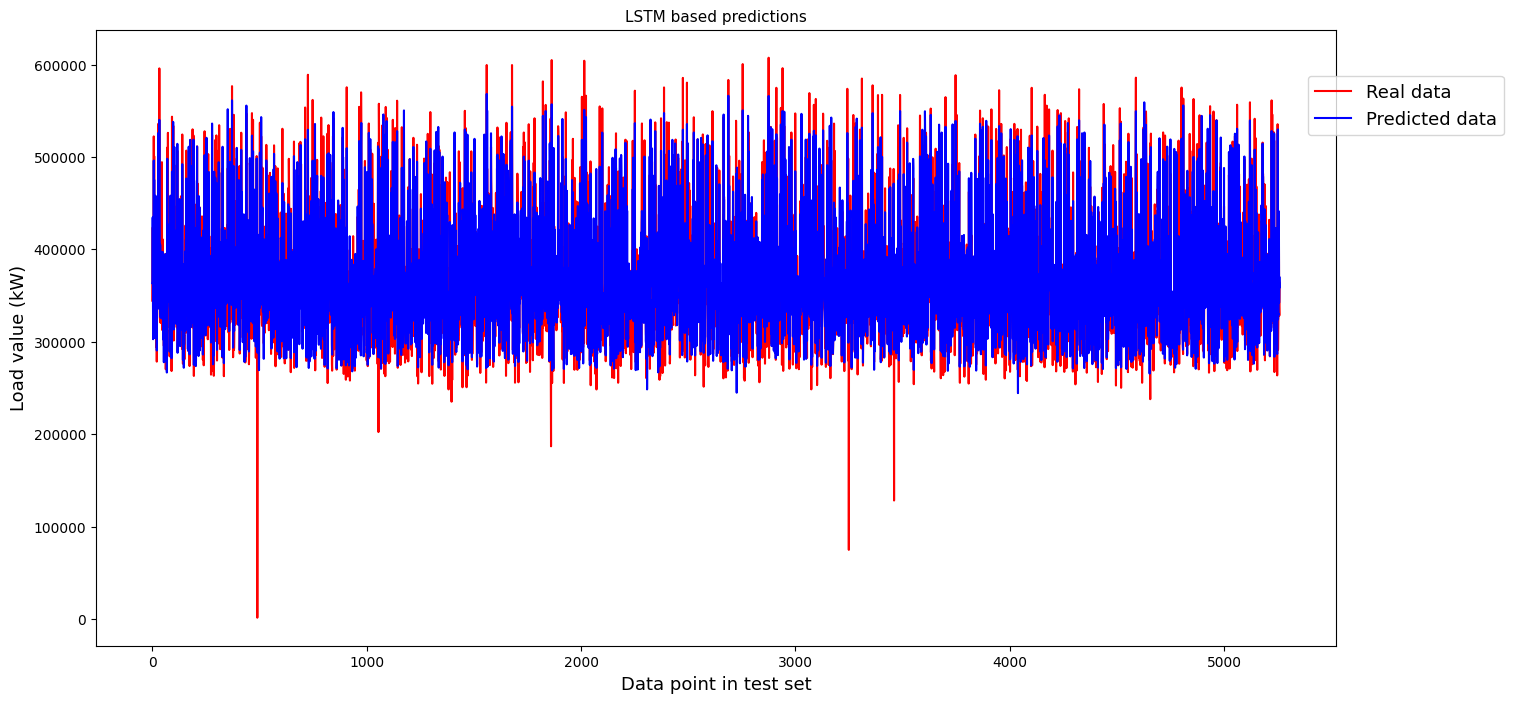

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(inv_y_1, color = 'red', label = 'Real data')
plt.plot(inv_yhat_1, color = 'blue', label = 'Predicted data')
plt.xlabel('Data point in test set', fontsize=13)
plt.ylabel('Load value (kW)',fontsize=13)
plt.title('LSTM based predictions', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.show()

In [ ]:
#Remaining steps:
#1. Try with a bunch of hyperparameters
#2. Inverse modeling